In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "HINDUNILVR.NS"
start = "2018-01-01"
end = "2023-10-30"

In [3]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1367.000000,1367.000000,1340.050049,1344.500000,1221.111816,746852
2018-01-02,1345.000000,1349.800049,1328.550049,1338.599976,1215.753540,695988
2018-01-03,1344.699951,1356.800049,1335.000000,1350.349976,1226.424927,832810
2018-01-04,1350.099976,1356.150024,1341.449951,1352.250000,1228.150635,640189
2018-01-05,1351.000000,1362.949951,1348.250000,1356.550049,1232.056030,568451
...,...,...,...,...,...,...
2023-10-20,2520.000000,2543.550049,2485.050049,2495.149902,2476.983154,3608160
2023-10-23,2494.000000,2509.949951,2480.350098,2483.500000,2465.417969,922707
2023-10-25,2475.050049,2490.000000,2465.000000,2477.300049,2459.263184,1435836


In [4]:
data = df['Close']
print(data.values)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
data

[1344.5        1338.59997559 1350.34997559 ... 2477.30004883 2476.39990234
 2482.05004883]


array([[0.03379845],
       [0.02991506],
       [0.03764889],
       ...,
       [0.77940504],
       [0.77881257],
       [0.78253148]])

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1151, 288)

In [6]:
print("Training Data Type:", type(training_data))
print("Training Data Size:", training_data.size)
print("Training Data Shape", training_data.shape) 
print("Training Data Dimension:", training_data.ndim)
print("Training Data:",training_data)
# print("Testing Data:", testing_data)

Training Data Type: <class 'numpy.ndarray'>
Training Data Size: 1151
Training Data Shape (1151, 1)
Training Data Dimension: 2
Training Data: [[0.03379845]
 [0.02991506]
 [0.03764889]
 ...
 [0.84318435]
 [0.84144019]
 [0.84423753]]


In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 8s 11ms/step - loss: 0.2714
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.2142
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1552
Epoch 4/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0976
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0537
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0423
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0466
Epoch 8/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0389
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0358
Epoch 10/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0339
Epoch 11/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0296
Epoch 12/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0260
Epoch 13/200
6/6 [==============================] 

6/6 [==============================] - 0s 10ms/step - loss: 4.5887e-04
Epoch 101/200
6/6 [==============================] - 0s 12ms/step - loss: 4.5664e-04
Epoch 102/200
6/6 [==============================] - 0s 9ms/step - loss: 4.5818e-04
Epoch 103/200
6/6 [==============================] - 0s 9ms/step - loss: 4.5723e-04
Epoch 104/200
6/6 [==============================] - 0s 10ms/step - loss: 4.5772e-04
Epoch 105/200
6/6 [==============================] - 0s 12ms/step - loss: 4.6168e-04
Epoch 106/200
6/6 [==============================] - 0s 12ms/step - loss: 4.5597e-04
Epoch 107/200
6/6 [==============================] - 0s 11ms/step - loss: 4.5870e-04
Epoch 108/200
6/6 [==============================] - 0s 12ms/step - loss: 4.5957e-04
Epoch 109/200
6/6 [==============================] - 0s 12ms/step - loss: 4.5792e-04
Epoch 110/200
6/6 [==============================] - 0s 11ms/step - loss: 4.6348e-04
Epoch 111/200
6/6 [==============================] - 0s 13ms/step - loss: 4.5494e

6/6 [==============================] - 0s 15ms/step - loss: 4.6006e-04
Epoch 197/200
6/6 [==============================] - 0s 14ms/step - loss: 4.5582e-04
Epoch 198/200
6/6 [==============================] - 0s 14ms/step - loss: 4.5645e-04
Epoch 199/200
6/6 [==============================] - 0s 14ms/step - loss: 4.5654e-04
Epoch 200/200
6/6 [==============================] - 0s 14ms/step - loss: 4.5666e-04


In [9]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [10]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [11]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 22.14773193359375
Root Mean Squared Error (RMSE): 32.438140291146894


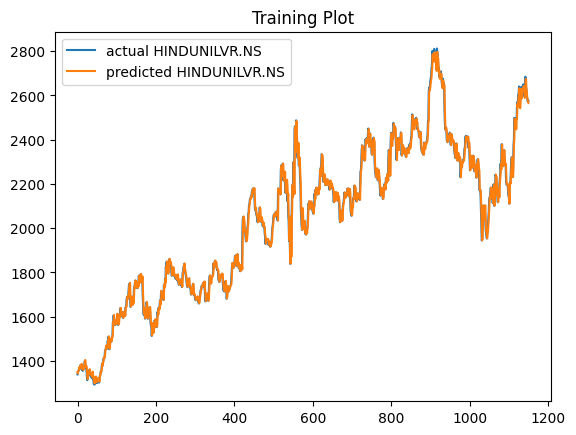

In [12]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 20.663259472996515
Root Mean Squared Error (RMSE): 27.903519621043404


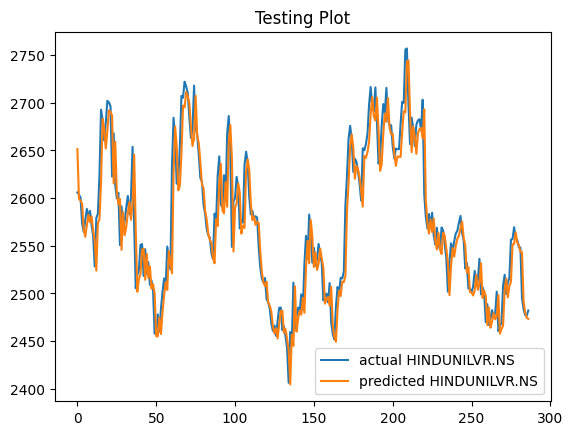

In [13]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [14]:
y_test[-1]

2482.050048828125

In [15]:
pred[-1]

array([2473.2988], dtype=float32)

In [16]:
future_start="2023-11-01"
future_end="2023-12-10"

future_data = yf.download(ticker, start=future_start, end=future_end)
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,2485.000000,2493.949951,2466.800049,2472.250000,2454.250000,1267131
2023-11-02,2475.000000,2496.000000,2463.300049,2486.800049,2486.800049,1595123
2023-11-03,2497.000000,2512.500000,2485.800049,2509.250000,2509.250000,1125583
2023-11-06,2515.000000,2517.750000,2491.100098,2497.399902,2497.399902,1338677
2023-11-07,2496.000000,2505.199951,2485.250000,2496.449951,2496.449951,1473411
2023-11-08,2498.000000,2525.000000,2497.699951,2519.350098,2519.350098,745022
2023-11-09,2520.050049,2522.000000,2473.050049,2476.699951,2476.699951,1823094
2023-11-10,2477.000000,2488.600098,2465.350098,2486.550049,2486.550049,771062
2023-11-13,2477.199951,2487.199951,2471.000000,2478.149902,2478.149902,760809


In [17]:
future_data = np.array(future_data['Close'])
len(future_data)

26

In [18]:
print(type(future_data))
# x = future_data.reshape(-1, 1)
# print(x)
# scaler.transform(x)

<class 'numpy.ndarray'>


In [19]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 53ms/step


In [20]:
days=list(range(1,len(future_data)+1))

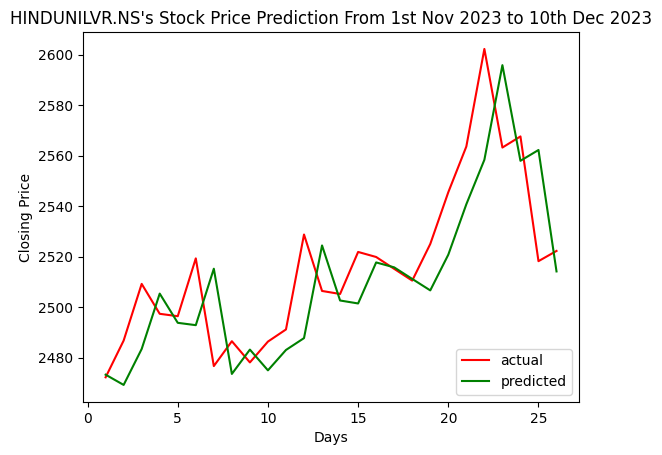

In [21]:
plt.title(f"{ticker}'s Stock Price Prediction From 1st Nov 2023 to 10th Dec 2023")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(days,future_data, label = 'actual', color='red')
plt.plot(days,future_predictions, label = 'predicted', color='green')
plt.legend(loc='lower right')
plt.show()

In [22]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [23]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [24]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

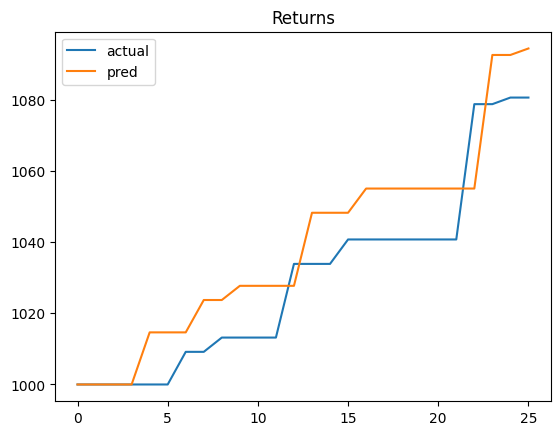

In [25]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()